# Quantitative Analysis and Trading Strategy

ESG funds are an increasingly popular segment of the ETF marketplace, offering values-driven investors a diverse portfolio of stocks without compromising their conscience.Vanguard ESG U.S. Stock ETF is one of the best performing and popular ESG ETF that tracks an index of U.S. stocks that are screened based on environmental, social, and governance (ESG) criteria.


In [6]:
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()

In [7]:
esgv = pdr.get_data_yahoo('ESGV')
esgv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-20,50.520000,50.340000,50.410000,50.490002,13000.0,48.506279
2018-09-21,51.500000,50.400002,51.500000,50.400002,13700.0,48.419807
2018-09-24,51.299999,50.119999,51.299999,50.240002,14300.0,48.266090
2018-09-25,50.400002,50.200001,50.400002,50.250000,25800.0,48.275700
2018-09-26,50.369999,50.020000,50.360001,50.020000,27000.0,48.054737


In [45]:
esgv['Return'] = round(np.log(esgv.Close).diff() * 100, 2)
esgv['Return'].head()

Date
2018-09-20     NaN
2018-09-21   -0.18
2018-09-24   -0.32
2018-09-25    0.02
2018-09-26   -0.46
Name: Return, dtype: float64

In [58]:
esgv.dropna(inplace=True)
esgv['Return'].head()

Date
2018-09-21   -0.18
2018-09-24   -0.32
2018-09-25    0.02
2018-09-26   -0.46
2018-09-27    0.30
Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

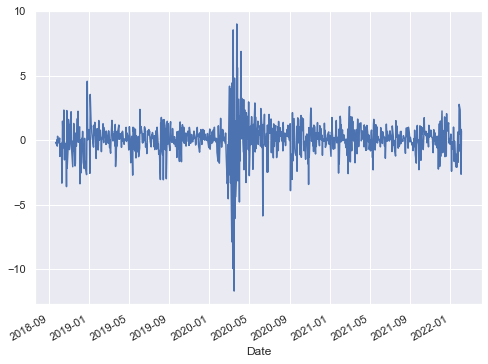

In [59]:
esgv['Return'].plot()

In [60]:
esgv['Return'].describe()

count    850.000000
mean       0.055647
std        1.429988
min      -11.690000
25%       -0.430000
50%        0.105000
75%        0.710000
max        9.000000
Name: Return, dtype: float64

### Price change Normal Distribution

In [19]:
from scipy import stats
from scipy.stats import norm

In [69]:
n, minmax, mean, var, skew, kurt = stats.describe(esgv['Return'])
min, max = minmax
std = var ** .5

In [70]:
x = norm.rvs(mean, std, n)

In [71]:
stats.describe(x)

DescribeResult(nobs=850, minmax=(-3.892635799858681, 4.328858761475449), mean=0.09288353765904678, variance=2.0288611879379683, skewness=0.03662679191300186, kurtosis=-0.30304814139305103)

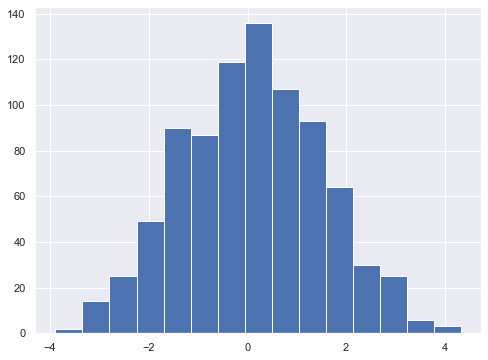

In [72]:
plt.hist(x, bins=15);

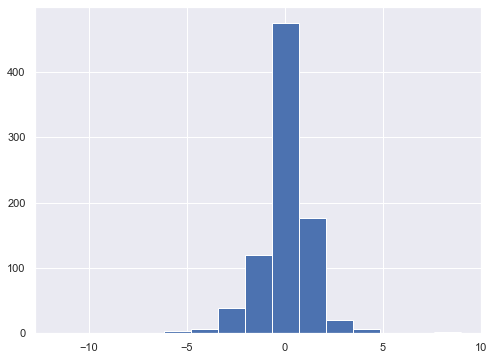

In [75]:
plt.hist(esgv['Return'], bins=15);

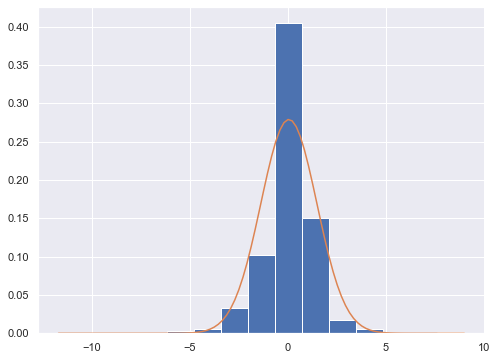

In [74]:
plt.hist(esgv['Return'], bins=15, edgecolor='w', density=True)
overlay = np.linspace(min, max, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

It is safe to say without further analysis that ESGV is not normally distributed.

### Random Walk

In [78]:
esgv_close = pd.DataFrame(esgv.Close, columns=['Close'])
esgv_close['lag_1'] = esgv_close.Close.shift(1)
esgv_close['lag_2'] = esgv_close.Close.shift(2)
esgv_close.dropna(inplace=True)
esgv_close.head()

,Close,lag_1,lag_2
Date,,,
2018-09-25,50.250000,50.240002,50.400002
2018-09-26,50.020000,50.250000,50.240002
2018-09-27,50.169998,50.020000,50.250000
2018-09-28,50.189999,50.169998,50.020000
2018-10-01,50.250000,50.189999,50.169998


In [81]:
#liner model
lr = np.linalg.lstsq(esgv_close[['lag_1', 'lag_2']], esgv_close['Close'], rcond=None)[0]

In [82]:
esgv_close['predict'] = np.dot(esgv_close[['lag_1', 'lag_2']], lr)

In [83]:
esgv_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2018-09-25,50.250000,50.240002,50.400002,50.296141
2018-09-26,50.020000,50.250000,50.240002,50.279401
2018-09-27,50.169998,50.020000,50.250000,50.087017
2018-09-28,50.189999,50.169998,50.020000,50.177325
2018-10-01,50.250000,50.189999,50.169998,50.217789


<AxesSubplot:xlabel='Date'>

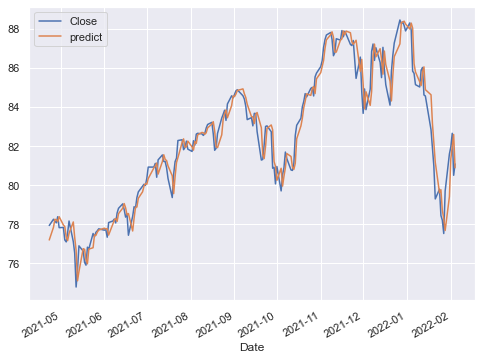

In [86]:
esgv_close.iloc[-200:][['Close', 'predict']].plot()

### Momentum Trading Strategy

Momentum trading is a strategy where an investor tries to understand the trend and seeks buying opportunities in short-term uptrends and sell when it loses momentum.

In [18]:
#delete and create columns 
esgv.drop(columns=['Adj Close', 'Volume'], inplace=True)
day = np.arange(1, len(esgv)+1)
esgv['Day'] = day

#column orders are rearranged 
esgv = esgv[['Day', 'Open', 'High', 'Low', 'Close']]

The moving average help smooth out price data by creating a constantly update average price and random fluctuation on the stock in the specified time frame are mitigated.

In [22]:
#moving average
esgv['9-day'] = esgv['Close'].rolling(9).mean().shift()
esgv['20-day'] = esgv['Close'].rolling(20).mean().shift()
esgv[9:25]

,Day,Open,High,Low,Close,15-day,20-day,9-day
Date,,,,,,,,
2018-10-03,10,50.419998,50.419998,50.209999,50.209999,NaN,NaN,50.237778
2018-10-04,11,50.230000,50.230000,49.459999,49.580002,NaN,NaN,50.206667
2018-10-05,12,49.720001,49.720001,49.040001,49.380001,NaN,NaN,50.115556
2018-10-08,13,49.340000,49.360001,48.840000,49.240002,NaN,NaN,50.020000
2018-10-09,14,49.230000,49.330002,49.070000,49.119999,NaN,NaN,49.907778
2018-10-10,15,49.130001,49.220001,47.509998,47.509998,NaN,NaN,49.807778
2018-10-11,16,47.490002,47.509998,46.380001,46.610001,49.812000,NaN,49.512222
2018-10-12,17,47.540001,47.540001,46.680000,47.299999,49.553334,NaN,49.114445
2018-10-15,18,47.389999,47.389999,46.970001,47.020000,49.346667,NaN,48.786667


In [29]:
#signal column
esgv['Signal'] = np.where(esgv['9-day'] > esgv['20-day'], 1, 0)
esgv['Signal'] = np.where(esgv['9-day'] < esgv['20-day'], -1, esgv['Signal'])
esgv.dropna(inplace=True)
esgv.tail()

,Day,Open,High,Low,Close,15-day,20-day,9-day,Signal,Return,System_return
Date,,,,,,,,,,,
2022-01-31,847,79.730003,81.610001,79.500000,81.589996,81.993332,83.277999,79.852222,-1,0.023437,-0.023437
2022-02-01,848,81.830002,82.190002,80.919998,81.949997,81.756666,82.962999,79.714444,-1,0.004403,-0.004403
2022-02-02,849,82.709999,82.779999,81.940002,82.650002,81.551999,82.645499,79.716665,-1,0.008506,-0.008506
2022-02-03,850,81.419998,81.769997,80.290001,80.500000,81.336666,82.381999,79.903332,-1,-0.026358,0.026358
2022-02-04,851,80.550003,81.730003,80.040001,81.080002,80.968666,82.115499,80.037777,-1,0.007179,-0.007179


In [32]:
esgv['Return'] = np.log(esgv['Close']).diff()
esgv['System_return'] = esgv['Signal'] * esgv['Return']
esgv['Entry'] = esgv.Signal.diff()
esgv.head()

,Day,Open,High,Low,Close,15-day,20-day,9-day,Signal,Return,System_return,entry,Entry
Date,,,,,,,,,,,,,
2018-10-19,22,47.720001,47.799999,47.169998,47.209999,48.672000,49.0580,47.815556,-1,NaN,NaN,NaN,NaN
2018-10-22,23,47.480000,47.490002,46.980000,47.090000,48.473333,48.8985,47.590000,-1,-0.002545,0.002545,0.0,0.0
2018-10-23,24,47.000000,47.009998,45.990002,46.959999,48.262667,48.7410,47.364444,-1,-0.002765,0.002765,0.0,0.0
2018-10-24,25,46.900002,46.900002,45.299999,45.299999,48.051333,48.5765,47.303333,-1,-0.035989,0.035989,0.0,0.0
2018-10-25,26,45.689999,46.369999,45.639999,46.349998,47.724000,48.3405,47.157778,-1,0.022914,-0.022914,0.0,0.0


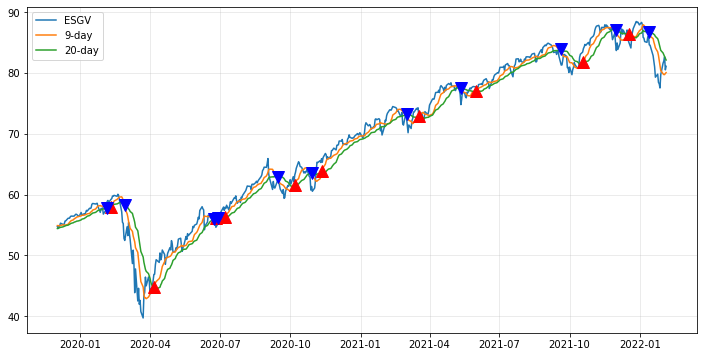

In [51]:
plt.rcParams['figure.figsize'] = 12, 6 
plt.grid(True, alpha = .3)
plt.plot(esgv[-550:]['Close'], label = 'ESGV')
plt.plot(esgv[-550:]['9-day'], label = '9-day')
plt.plot(esgv[-550:]['20-day'], label = '20-day')
plt.plot(esgv[-550:].loc[esgv.Entry == 2].index, esgv[-550:]['9-day'][esgv.Entry == 2], 
         '^', color='r', markersize = 12)
plt.plot(esgv[-550:].loc[esgv.Entry == -2].index, esgv[-550:]['20-day'][esgv.Entry == -2],
         'v', color='b', markersize = 12)
plt.legend(loc=2)

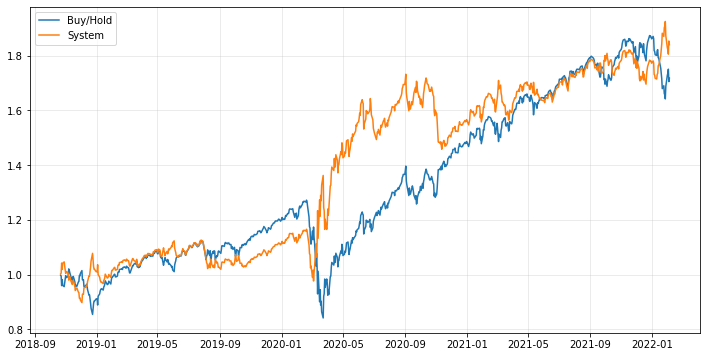

In [54]:
plt.plot(np.exp(esgv['Return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(esgv['System_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)